In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [60]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp_WeForever.txt','r',encoding='utf-8')

data = f.read()



In [61]:
dummy = data.split('\n')
dummy

['12/27/18, 11:22 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '12/27/18, 11:22 PM - Visesh Msit created group "CountDown to ReUnion 😜"',
 '12/27/18, 11:22 PM - Visesh Msit added you',
 '12/27/18, 11:22 PM - Pranava: 😂😂😂',
 '12/27/18, 11:22 PM - Visesh Msit: Eroju fotos pampandi',
 '12/27/18, 11:22 PM - Priya Msit: Thanks for creating one',
 '12/27/18, 11:24 PM - Pranava: Everikana badha ga vunte revathi videos chudandi',
 '12/27/18, 11:24 PM - Priya Msit: 😅',
 '12/27/18, 11:24 PM - Visesh Msit: Amelo ninn chuskuntam😀😂',
 '12/27/18, 11:24 PM - Visesh Msit: Lakalakalakaa',
 '12/27/18, 11:25 PM - Pranava: 🙄🙄🙄',
 '12/27/18, 11:25 PM - Visesh Msit: Nuv alantivi cheyi 😀 Pranava noida official',
 '12/27/18, 11:26 PM - Priya Msit: Insta name ah',
 '12/27/18, 11:26 PM - Visesh Msit: 😝',
 '12/27/18, 11:26 PM - Pranava: 🤦🏻\u200d♀🤦🏻\u200d♀',
 '12/27/18, 11:26 PM - Pranava: Na bondha',
 '12/27/18

In [62]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

# pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:AM|PM) - '
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))
print(messages)

35536
35536
['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Visesh Msit created group "CountDown to ReUnion 😜"\n', 'Visesh Msit added you\n', 'Pranava: 😂😂😂\n', 'Visesh Msit: Eroju fotos pampandi\n', 'Priya Msit: Thanks for creating one\n', 'Pranava: Everikana badha ga vunte revathi videos chudandi\n', 'Priya Msit: 😅\n', 'Visesh Msit: Amelo ninn chuskuntam😀😂\n', 'Visesh Msit: Lakalakalakaa\n', 'Pranava: 🙄🙄🙄\n', 'Visesh Msit: Nuv alantivi cheyi 😀 Pranava noida official\n', 'Priya Msit: Insta name ah\n', 'Visesh Msit: 😝\n', 'Pranava: 🤦🏻\u200d♀🤦🏻\u200d♀\n', 'Pranava: Na bondha\n', 'Priya Msit: With Sruthi\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', 'Pranava: <Media omitted>\n', "Priya Msit changed this group's icon\n", 'Shrut

In [63]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [64]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [65]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM
2,Visesh Msit added you\n,12/27/18 11:22 PM
3,Pranava: 😂😂😂\n,12/27/18 11:22 PM
4,Visesh Msit: Eroju fotos pampandi\n,12/27/18 11:22 PM


In [66]:
df['user_messages']

0        Messages and calls are end-to-end encrypted. N...
1        Visesh Msit created group "CountDown to ReUnio...
2                                  Visesh Msit added you\n
3                                           Pranava: 😂😂😂\n
4                      Visesh Msit: Eroju fotos pampandi\n
                               ...                        
35531                                         harish: 😂😂\n
35532                   Visesh Msit: Feel avtunaru chudu\n
35533                            Vignan: <Media omitted>\n
35534                       Vishnu Msit: <Media omitted>\n
35535                       Visesh Msit: <Media omitted>\n
Name: user_messages, Length: 35536, dtype: object

In [67]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification
3,😂😂😂,12/27/18 11:22 PM,Pranava
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit


In [68]:
16/08/18 20:09
    
YYYY-MM-DD

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1600446170.py, line 1)

In [69]:
df.shape

(35536, 3)

In [70]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit,2018-12-27,2018,12,December,27,Thursday,23,22


In [71]:
df[df['User'] == 'Pranava']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
6,Everikana badha ga vunte revathi videos chudandi,12/27/18 11:24 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,24
10,🙄🙄🙄,12/27/18 11:25 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,25
14,🤦🏻‍♀🤦🏻‍♀,12/27/18 11:26 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,26
15,Na bondha,12/27/18 11:26 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,26
...,...,...,...,...,...,...,...,...,...,...,...
35495,<Media omitted>,6/25/22 2:48 PM,Pranava,2022-06-25,2022,6,June,25,Saturday,14,48
35497,🤨,6/25/22 2:58 PM,Pranava,2022-06-25,2022,6,June,25,Saturday,14,58
35505,<Media omitted>,6/27/22 8:39 PM,Pranava,2022-06-27,2022,6,June,27,Monday,20,39
35520,Foreginers everu ana🤣🤣,7/1/22 5:19 PM,Pranava,2022-07-01,2022,7,July,1,Friday,17,19


In [72]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

130818


In [73]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Visesh',
 'Msit',
 'created',
 'group',
 '"CountDown',
 'to',
 'ReUnion',
 '😜"',
 'Visesh',
 'Msit',
 'added',
 'you',
 '😂😂😂',
 'Eroju',
 'fotos',
 'pampandi',
 'Thanks',
 'for',
 'creating',
 'one',
 'Everikana',
 'badha',
 'ga',
 'vunte',
 'revathi',
 'videos',
 'chudandi',
 '😅',
 'Amelo',
 'ninn',
 'chuskuntam😀😂',
 'Lakalakalakaa',
 '🙄🙄🙄',
 'Nuv',
 'alantivi',
 'cheyi',
 '😀',
 'Pranava',
 'noida',
 'official',
 'Insta',
 'name',
 'ah',
 '😝',
 '🤦🏻\u200d♀🤦🏻\u200d♀',
 'Na',
 'bondha',
 'With',
 'Sruthi',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Priya',
 'Msit',
 'changed',
 'this',
 "group's",
 'ic

In [74]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Jagss')].shape

(0, 11)

In [75]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       'Visesh Msit created group "CountDown to ReUnion 😜"',
       'Visesh Msit added you', ...,
       'Maku chepale, Anusha ala start chesindhi',
       'Rich ga NRI ani chepu mawa', 'Feel avtunaru chudu'], dtype=object)

In [76]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
17,<Media omitted>,12/27/18 11:27 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,27
18,<Media omitted>,12/27/18 11:27 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,27
19,<Media omitted>,12/27/18 11:27 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,27
20,<Media omitted>,12/27/18 11:27 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,27
21,<Media omitted>,12/27/18 11:27 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,27
...,...,...,...,...,...,...,...,...,...,...,...
35511,<Media omitted>,7/1/22 12:51 AM,Visesh Msit,2022-07-01,2022,7,July,1,Friday,0,51
35512,<Media omitted>,7/1/22 12:59 AM,Visesh Msit,2022-07-01,2022,7,July,1,Friday,0,59
35533,<Media omitted>,7/1/22 5:23 PM,Vignan,2022-07-01,2022,7,July,1,Friday,17,23
35534,<Media omitted>,7/1/22 9:34 PM,Vishnu Msit,2022-07-01,2022,7,July,1,Friday,21,34


In [77]:
df['User'].value_counts().head()

Visesh Msit    7482
Priya Msit     6812
Vignan         5553
Pranava        4826
~Prem          3535
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

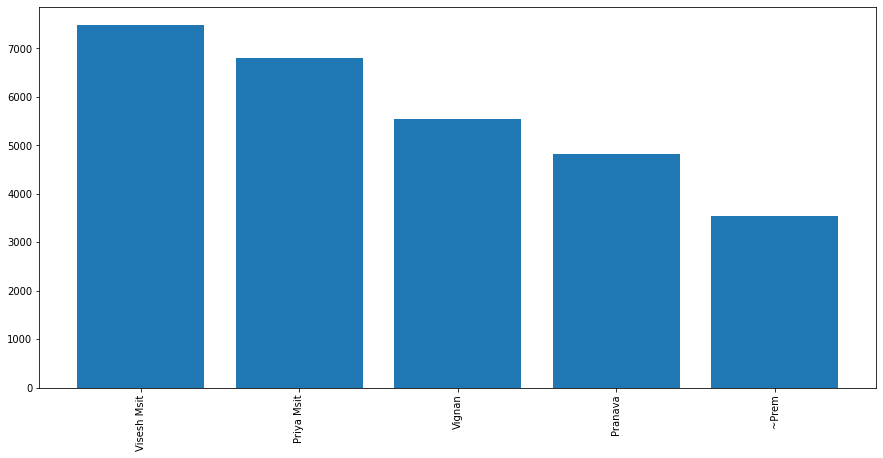

In [78]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [79]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'<Media': 3666,
 'omitted>': 3666,
 'lo': 1647,
 'ra': 1544,
 '😂': 1394,
 'ki': 999,
 'kuda': 777,
 'ga': 741,
 'kada': 688,
 'ani': 670,
 'a': 601,
 'ah': 454,
 '😆': 412,
 'ne': 391,
 '😂😂': 380,
 'to': 377,
 '😂😂😂': 363,
 'I': 350,
 'le': 350,
 'message': 315,
 'deleted': 306,
 'em': 295,
 'ni': 286,
 'and': 283,
 'was': 280,
 'This': 279,
 'ante': 278,
 'Ha': 269,
 'oka': 260,
 'la': 260,
 'in': 259,
 'Haa': 251,
 'undi': 247,
 'e': 236,
 'is': 233,
 'na': 230,
 'anta': 227,
 'inka': 225,
 'vignan': 223,
 'ala': 218,
 'Inka': 214,
 '😄': 207,
 'Nenu': 206,
 'Happy': 206,
 'you': 204,
 '😅': 203,
 'the': 201,
 'antha': 194,
 'time': 192,
 'Em': 190,
 'for': 172,
 'nen': 172,
 'emo': 167,
 'join': 166,
 'eh': 165,
 'prem': 163,
 'Emi': 162,
 'Nen': 160,
 '2': 155,
 'nundi': 152,
 'tho': 151,
 'Vignan': 151,
 'call': 151,
 'of': 150,
 'Nuvvu': 149,
 'raa': 148,
 'lu': 147,
 'nenu': 146,
 'Adi': 144,
 'Achyuth': 143,
 'vadu': 142,
 'E': 141,
 '🤣': 140,
 'Ade': 139,
 'start': 138,
 'this': 

In [80]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,3666
1,omitted>,3666
2,lo,1647
3,ra,1544
4,😂,1394
5,ki,999
6,kuda,777
7,ga,741
8,kada,688
9,ani,670


In [ ]:
a,an,the,you,ok,...

In [81]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit,2018-12-27,2018,12,December,27,Thursday,23,22
...,...,...,...,...,...,...,...,...,...,...,...
35531,😂😂,7/1/22 5:22 PM,harish,2022-07-01,2022,7,July,1,Friday,17,22
35532,Feel avtunaru chudu,7/1/22 5:23 PM,Visesh Msit,2022-07-01,2022,7,July,1,Friday,17,23
35533,<Media omitted>,7/1/22 5:23 PM,Vignan,2022-07-01,2022,7,July,1,Friday,17,23
35534,<Media omitted>,7/1/22 9:34 PM,Vishnu Msit,2022-07-01,2022,7,July,1,Friday,21,34


In [82]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,3666
1,omitted>,3666
2,ra,1575
3,😂,1394
4,kuda,786
5,ga,754
6,kada,706
7,ani,703
8,ah,582
9,em,485


In [83]:
!pip install emoji

     -------------------------------------- 175.4/175.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1087ce552a85fba58b5e16c2c77dd3e82231cadef6c8e8aa675a33bd0689dfa6
  Stored in directory: c:\users\dss7884\appdata\local\pip\cache\wheels\31\8a\8c\315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [84]:
import emoji

In [85]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,😂,4997
1,😆,1424
2,🤣,1408
3,🏻,925
4,🤭,599
...,...,...
200,🚩,1
201,🍊,1
202,🧃,1
203,💎,1


In [86]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,😂,4997
1,😆,1424
2,🤣,1408
3,🏻,925
4,🤭,599
...,...,...
200,🚩,1
201,🍊,1
202,🧃,1
203,💎,1


In [87]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit,2018-12-27,2018,12,December,27,Thursday,23,22


In [88]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [89]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit,2018-12-27,2018,12,December,27,Thursday,23,22


In [ ]:
1,2,2,3,4,4,4,5,6,7,3,4


1| 2 2 | 3 3| 4 4 4 4 | 5 | 6 | 7

{4 : 4, 3:2 , 2:2,} 

In [90]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,12,December,286
1,2019,1,January,2265
2,2019,2,February,197
3,2019,3,March,805
4,2019,4,April,76
5,2019,5,May,2951
6,2019,6,June,1267
7,2019,7,July,1670
8,2019,8,August,1816
9,2019,9,September,325


In [91]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2018,12,December,286
1,2019,1,January,2265
2,2019,2,February,197
3,2019,3,March,805
4,2019,4,April,76
5,2019,5,May,2951
6,2019,6,June,1267
7,2019,7,July,1670
8,2019,8,August,1816
9,2019,9,September,325


In [92]:
temp.shape

(44, 4)

In [93]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'December-2018'

In [94]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2018,12,December,286,December-2018
1,2019,1,January,2265,January-2019
2,2019,2,February,197,February-2019
3,2019,3,March,805,March-2019
4,2019,4,April,76,April-2019
5,2019,5,May,2951,May-2019
6,2019,6,June,1267,June-2019
7,2019,7,July,1670,July-2019
8,2019,8,August,1816,August-2019
9,2019,9,September,325,September-2019


In [95]:
temp

,Year,Month_num,Month,Message,Time
0,2018,12,December,286,December-2018
1,2019,1,January,2265,January-2019
2,2019,2,February,197,February-2019
3,2019,3,March,805,March-2019
4,2019,4,April,76,April-2019
5,2019,5,May,2951,May-2019
6,2019,6,June,1267,June-2019
7,2019,7,July,1670,July-2019
8,2019,8,August,1816,August-2019
9,2019,9,September,325,September-2019


In [96]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
1,"Visesh Msit created group ""CountDown to ReUnio...",12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
2,Visesh Msit added you,12/27/18 11:22 PM,Group Notification,2018-12-27,2018,12,December,27,Thursday,23,22
3,😂😂😂,12/27/18 11:22 PM,Pranava,2018-12-27,2018,12,December,27,Thursday,23,22
4,Eroju fotos pampandi,12/27/18 11:22 PM,Visesh Msit,2018-12-27,2018,12,December,27,Thursday,23,22


In [97]:
temp1 = df['Day_name'].value_counts()

In [98]:
temp1

Wednesday    6286
Tuesday      5425
Thursday     5274
Saturday     4969
Sunday       4708
Friday       4589
Monday       4285
Name: Day_name, dtype: int64

In [99]:
list(temp1.index)

['Wednesday', 'Tuesday', 'Thursday', 'Saturday', 'Sunday', 'Friday', 'Monday']

In [100]:
list(temp1.values)

[6286, 5425, 5274, 4969, 4708, 4589, 4285]

In [101]:
temp2 = df['Month'].value_counts()

In [102]:
temp2

May          6865
April        5218
August       3963
January      3227
June         2766
July         2739
March        2248
November     1979
February     1740
September    1666
October      1621
December     1504
Name: Month, dtype: int64

In [103]:
list(temp2.index),list(temp2.values)

(['May',
  'April',
  'August',
  'January',
  'June',
  'July',
  'March',
  'November',
  'February',
  'September',
  'October',
  'December'],
 [6865, 5218, 3963, 3227, 2766, 2739, 2248, 1979, 1740, 1666, 1621, 1504])

In [104]:
def monthly_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time

    return timeline

In [106]:
user_list = df['User'].unique().tolist()
user_list

['Group Notification',
 'Pranava',
 'Visesh Msit',
 'Priya Msit',
 'Shruthi Msit',
 'Vignan',
 'harish',
 '~Prem',
 'Achyuth msit1',
 'Vishnu Msit',
 'Anusha msit1',
 '+91 76720 71338',
 '+91 83419 57974',
 '+1 (279) 842-7126']

In [107]:
user_list.insert(0, "Overall")
user_list

['Overall',
 'Group Notification',
 'Pranava',
 'Visesh Msit',
 'Priya Msit',
 'Shruthi Msit',
 'Vignan',
 'harish',
 '~Prem',
 'Achyuth msit1',
 'Vishnu Msit',
 'Anusha msit1',
 '+91 76720 71338',
 '+91 83419 57974',
 '+1 (279) 842-7126']